In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/Users/macmedics/DSI/Submissions/Projects/project_1/code


In [3]:
final = pd.read_csv('../data/final.csv')

In [4]:
final.head()

Unnamed: 0       state  sat_participation  sat_eb_reading_and_writing  \
0           0     Alabama                  5                         593   
1           1      Alaska                 38                         547   
2           2     Arizona                 30                         563   
3           3    Arkansas                  3                         614   
4           4  California                 53                         531   

   sat_math  sat_total  act_participation  act_english  act_math  act_reading  \
0       572       1165                100         18.9      18.4         19.7   
1       533       1080                 65         18.7      19.8         20.4   
2       553       1116                 62         18.6      19.8         20.1   
3       594       1208                100         18.9      19.0         19.7   
4       524       1055                 31         22.5      22.7         23.1   

   ...  sat_participation_2018  sat_eb_reading_and_writing_2018  \
0  ...                       6                              595   
1  ...                      43                              562   
2  ...                      29                              577   
3  ...                       5                              592   
4  ...                      60                              540   

   sat_math_2018  sat_total_2018  act_participation_2018  act_composite_2018  \
0            571            1166                     100                19.1   
1            544            1106                      33                20.8   
2            572            1149                      66                19.2   
3            576            1169                     100                19.4   
4            536            1076                      27                22.7   

   act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
0              18.9           18.3              19.6              19.0  
1              19.8           20.6              21.6              20.7  
2              18.2           19.4              19.5              19.2  
3              19.1           18.9              19.7              19.4  
4              22.5           22.5              23.0              22.1  

[5 rows x 22 columns]

In [7]:
sats = final[['state', 'sat_participation', 'sat_participation_2018', 'sat_total', 'sat_total_2018']]

In [8]:
acts = final[['state', 'act_participation', 'act_participation_2018', 'act_composite', 'act_composite_2018']]

In [13]:
acts.drop('partic_change', axis = 1, inplace = True)

/Users/macmedics/anaconda3/envs/dsi/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
acts['part_change'] = acts['act_participation_2018'] - acts['act_participation']

In [21]:
sats['part_change'] = sats['sat_participation_2018'] - sats['sat_participation']

/Users/macmedics/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
sorted_sat_change = sats[['state', 'part_change']].sort_values(by = 'part_change')

In [38]:
biggest_drops = sorted_sat_change[sorted_sat_change['part_change'] < 0].head()

In [41]:
biggest_increase = sorted_sat_change[sorted_sat_change['part_change'] > 0].tail()

In [42]:
biggest_increase

state  part_change
30     New Jersey           12
48  West Virginia           14
39   Rhode Island           26
5        Colorado           89
13       Illinois           90

<BarContainer object of 4 artists>

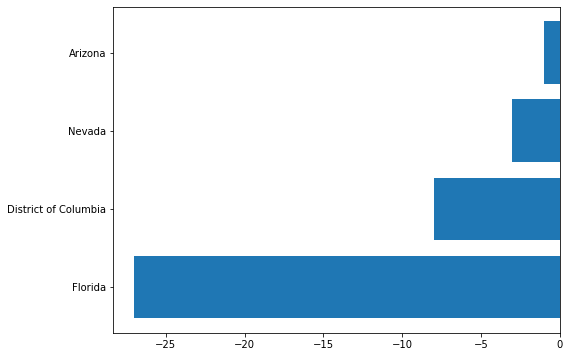

In [46]:
plt.figure(figsize = (8, 6))
plt.barh(biggest_drops['state'], biggest_drops['part_change'])

<BarContainer object of 5 artists>

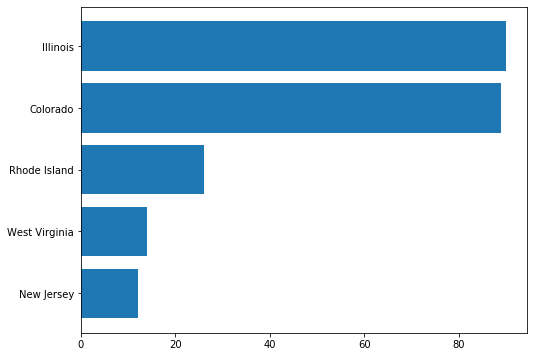

In [47]:
plt.figure(figsize = (8, 6))
plt.barh(biggest_increase['state'], biggest_increase['part_change'])